# Bank Chun Prediction Case Study

## Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.


## Data Description

- The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc. 

 
**Data Dictionary**

 - CustomerId: Unique ID which is assigned to each customer
 - Surname: Last name of the customer 
 - CreditScore: It defines the credit history of the customer.
 - Geography: A customer’s location 
 - Gender: It defines the Gender of the customer
 - Age: Age of the customer
 - Tenure: Number of years for which the customer has been with the bank
 - NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
 - Balance: Account balance
 - HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
 - EstimatedSalary: Estimated salary
 - isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
 -  Excited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 

                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )

    
    
      
       
       
         
    
    

    
   




## Let's start coding!

### Importing necessary libraries

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [3]:
tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)

In [5]:
#Let's Load the data
data= pd.read_csv("Churn_Modelling.csv")

In [6]:
#Let's try to know the shpae of the data

data.shape

(10000, 14)

- There are 10,000 rows and 14 columns(features) in the dataset.

In [7]:
#Let's see the head of the data
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
#Let's see the bottom of the data 
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9953,9954,15655952,Burke,550,France,Male,47,2,0.00,2,1,1,97057.28,0
3850,3851,15775293,Stephenson,680,France,Male,34,3,143292.95,1,1,0,66526.01,0
4962,4963,15665088,Gordon,531,France,Female,42,2,0.00,2,0,1,90537.47,0
3886,3887,15720941,Tien,710,Germany,Male,34,8,147833.30,2,0,1,1561.58,0
5437,5438,15733476,Gonzalez,543,Germany,Male,30,6,73481.05,1,1,1,176692.65,0
8517,8518,15671800,Robinson,688,France,Male,20,8,137624.40,2,1,1,197582.79,0
2041,2042,15709846,Yeh,840,France,Female,39,1,94968.97,1,1,0,84487.62,0
1989,1990,15622454,Zaitsev,695,Spain,Male,28,0,96020.86,1,1,1,57992.49,0
1933,1934,15815560,Bogle,666,Germany,Male,74,7,105102.50,1,1,1,46172.47,0
9984,9985,15696175,Echezonachukwu,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0


In [10]:
# Let's check for duplicate values in the data
data.duplicated().sum()

0

- There is no duplicate value in the dataset

In [11]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [12]:
# dropping the RowNumber column as it does not provide any information
df.drop("RowNumber", axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


## Observation:
- There is no null value in the dataset. So, the data is well organized.

- The data contains a mixture of Categorical, integer and float type.

In [14]:
# Let's check for missing values in the data
round(df.isnull().sum() /df.isnull().count() * 100, 2)

CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

- There is no null value in any of the cell of the dataset

In [15]:
df["Exited"].value_counts(1)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

# Observation:

- We are watching that the data is partially biased based on the count of 0 and 1.

In [16]:
# Let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


### Observation:

- Age is showing a maximum of 92. It might be an outlier or it might be an actual value which needs further investigation.

- Tenure and Balance are showing a minimum of 0. It might be due to typing mistake or it might be an actual value which needs further investigation.

In [17]:
# Let's check the number of unique values in each column
df.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [18]:
# Let's drop `CustomerId` as it is showing all the values unique. 
df.drop("CustomerId", axis=1, inplace=True)

# EDA

### Univariate Analysis

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [20]:
df.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

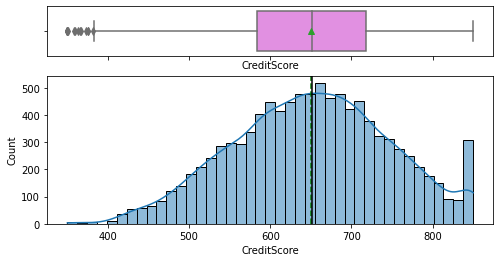

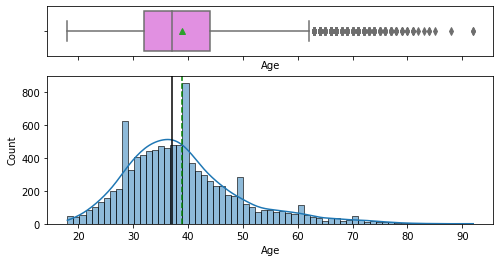

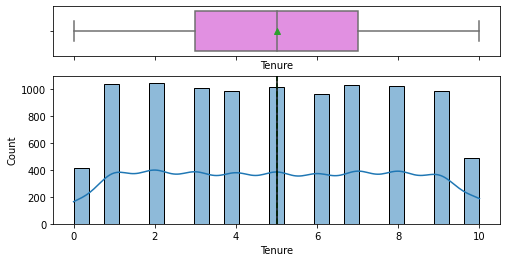

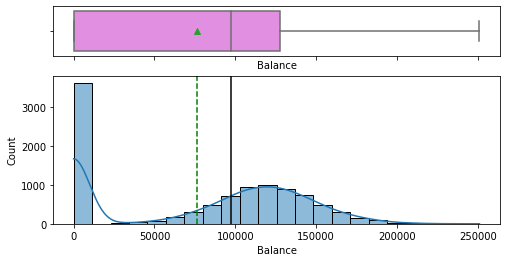

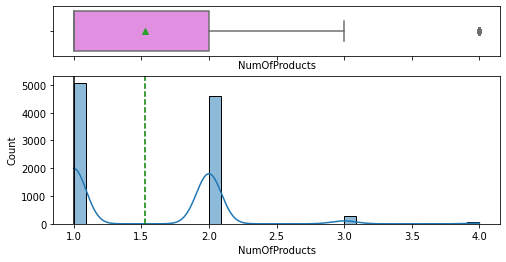

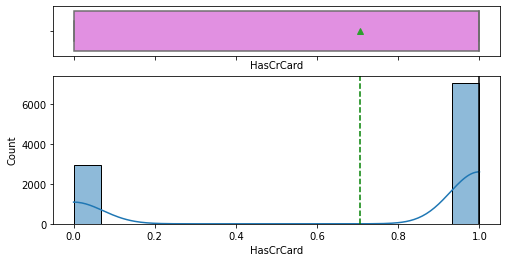

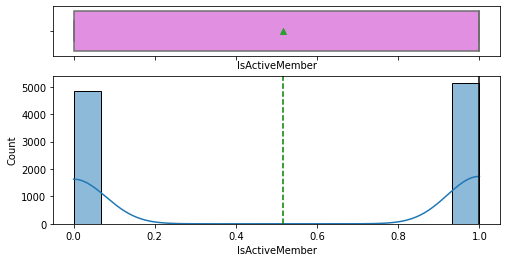

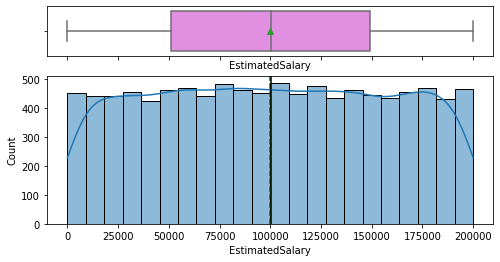

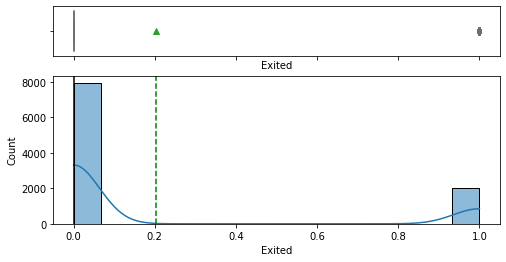

In [21]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item, kde=True, figsize=(8, 4))

**Observations**

- `CreditScore` is showing a left skewed distribution along with some outliers.
- `Age` is showing a right skewed distribution along with some outliers.
- The rest of the graph is not providing with much of the information.

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

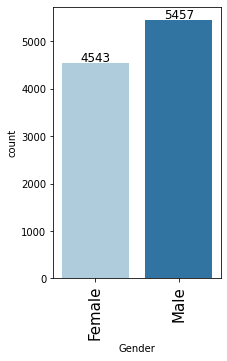

In [23]:
labeled_barplot(df, "Gender")

- `Male` is greater than `Feamale` in the dataset.

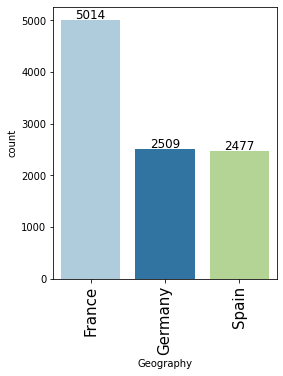

In [24]:
labeled_barplot(df, "Geography")

- `France` is the highest in the dataset.

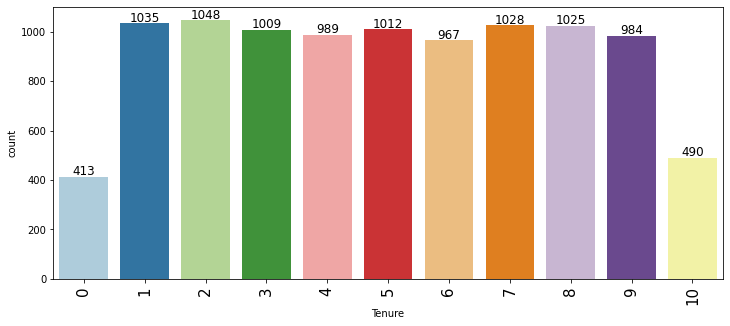

In [25]:
labeled_barplot(df, "Tenure")

- `Tenure` is more or less almost same throughout the dataset except for `Tenure` 0 & 10.

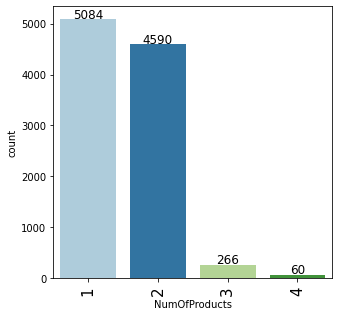

In [26]:
labeled_barplot(df, "NumOfProducts")

- `NumOfProducts` is 1 in the highest amount in the dataset.

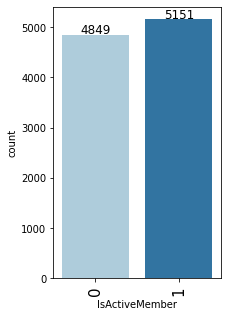

In [27]:
labeled_barplot(df, "IsActiveMember")

**Observations**

- Maximum member is active in the dataset.

### Bivariate Analsysis

**Let's check for correlations.**

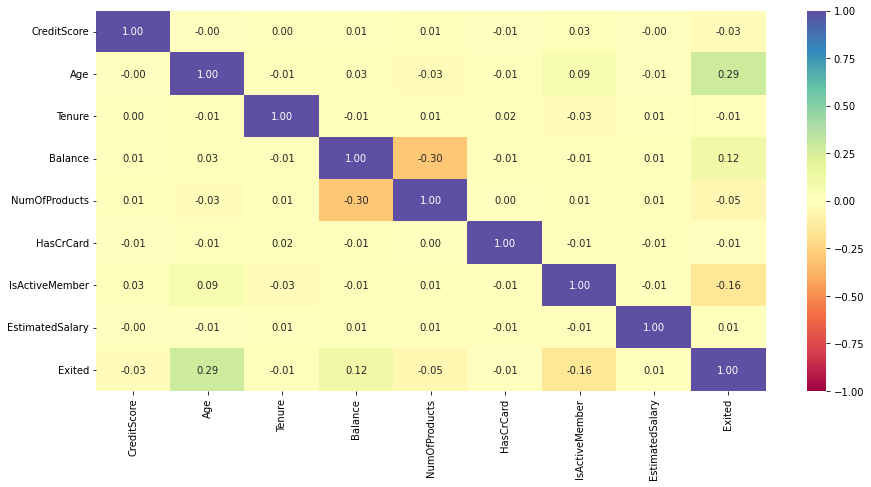

In [28]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observation**

- No acute positive or negative correlation is found here.

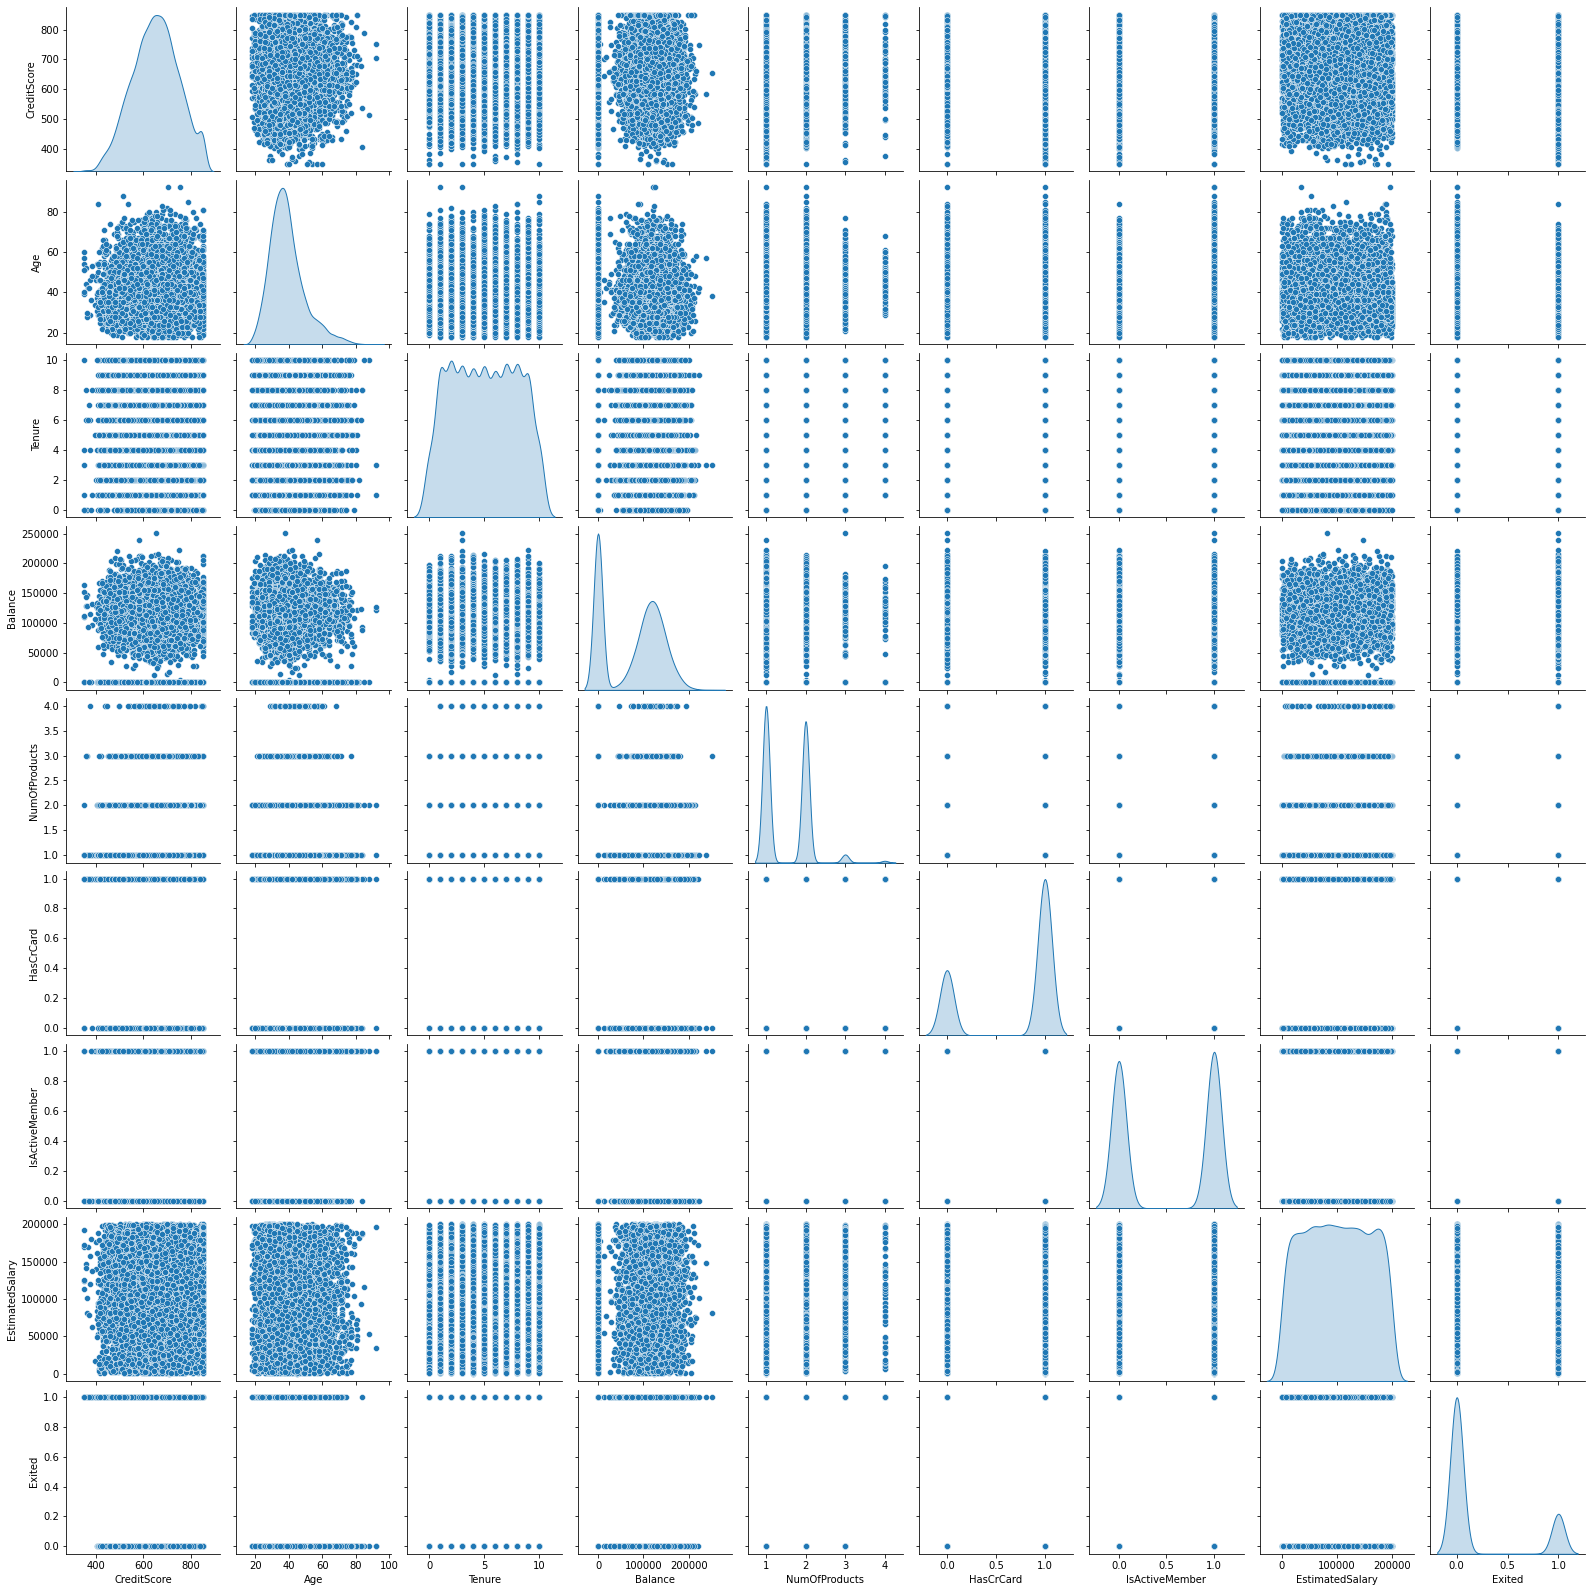

In [29]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

**Observation**

- The data is scattered. So, no acute positive or negative correlation is found here.

In [30]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


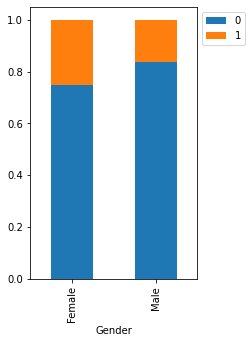

In [31]:
stacked_barplot(df, "Gender", "Exited")

**Observation**

- `Female` customer left the bank more than the `Male` customer.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


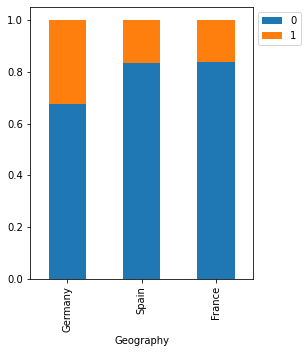

In [32]:
stacked_barplot(df, "Geography", "Exited")

**Observation**

- `German` customer left the bank is the highest in number in the entire dataset.

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


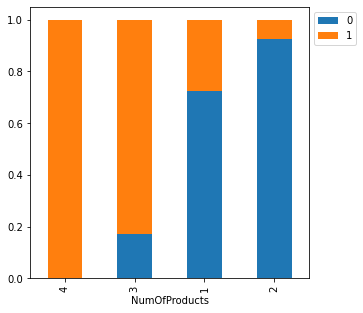

In [33]:
stacked_barplot(df, "NumOfProducts", "Exited")

**Observation**

- `NumOfProduct` purchased 4 customers left the bank is the highest in number in the entire dataset. While `NumOfProduct` purchased 2 customers left the bank is the highest in number in the entire dataset.

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


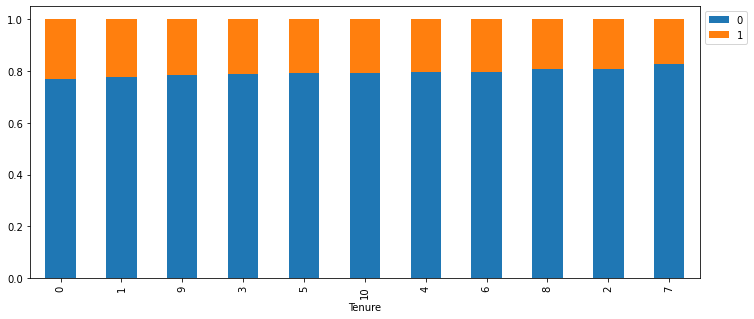

In [34]:
stacked_barplot(df, "Tenure", "Exited")

**Observations**

- The decision of leaving the bank seems to be independent of `Tenure`.

In [35]:
# filtering object type columns
cat_columns = data.describe(include=['object']).columns
cat_columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [36]:
#Let's look into the unique values in each object data type column
for i in cat_columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*50)

Unique values in Surname are :
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


In [37]:
## converting object type columns to category
data[cat_columns] = data[cat_columns].astype('category')

In [38]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [39]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [40]:
## Separating Independent and Dependent Columns
X = df.drop(['Exited'],axis=1)
Y = df[['Exited']]

In [41]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [42]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [43]:
X_train.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

### Observation
- There is no null value in X-train data.

In [44]:
X_train.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,Walton,753,France,Male,57,7,0.00,1,1,0,159475.08
8392,Belcher,739,Germany,Male,32,3,102128.27,1,1,0,63981.37
5006,Chikere,755,Germany,Female,37,0,113865.23,2,1,1,117396.25
4117,Pagnotto,561,France,Male,37,5,0.00,2,1,0,83093.25
7182,Rhodes,692,Germany,Male,49,6,110540.43,2,0,1,107472.99


In [45]:
y_train.head()

,Exited
2151,1
8392,1
5006,0
4117,0
7182,0


In [46]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000, 1)
(2000, 1)


### Encoding Categorical Columns

- Let's encode categorical variables with LabelEncoder.

In [47]:
from sklearn.preprocessing import LabelEncoder
labelencoder_GE = LabelEncoder()
X_train['Geography']= labelencoder_GE.fit_transform(X_train['Geography'])
X_test['Geography']= labelencoder_GE.transform(X_test['Geography'])

In [48]:
labelencoder_G= LabelEncoder()
X_train['Gender'] =  labelencoder_G.fit_transform(X_train['Gender'])
X_test['Gender'] =  labelencoder_G.fit_transform(X_test['Gender'])

In [49]:
labelencoder_S= LabelEncoder()
X_train['Surname'] =  labelencoder_S.fit_transform(X_train['Surname'])
X_test['Surname'] =  labelencoder_S.fit_transform(X_test['Surname'])



In [50]:
X_train.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,2466,753,0,1,57,7,0.00,1,1,0,159475.08
8392,185,739,1,1,32,3,102128.27,1,1,0,63981.37
5006,449,755,1,0,37,0,113865.23,2,1,1,117396.25
4117,1885,561,0,1,37,5,0.00,2,1,0,83093.25
7182,2035,692,1,1,49,6,110540.43,2,0,1,107472.99


### Model Building

- Let's check different kind of Neural Network model to find the optimized model. We are going to consider Recall score as a selection criterion, because we think bank wants to know who is leaving the bank services and join another bank.

### Model 1

In [51]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [52]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [53]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46,337
Trainable params: 46,337
Non-trainable params: 0
_________________________________________________________________


In [54]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 2s 9ms/step - loss: 2367.1040 - accuracy: 0.6931 - val_loss: 545.7243 - val_accuracy: 0.6500
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 683.8354 - accuracy: 0.6770 - val_loss: 218.0634 - val_accuracy: 0.7206
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 626.2405 - accuracy: 0.6842 - val_loss: 185.7614 - val_accuracy: 0.7987
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 231.7215 - accuracy: 0.6800 - val_loss: 294.2098 - val_accuracy: 0.8000
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 125.4316 - accuracy: 0.6836 - val_loss: 164.5959 - val_accuracy: 0.7994
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 150.8891 - accuracy: 0.6836 - val_loss: 258.9818 - val_accuracy: 0.7994
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 132.2145 - accuracy: 0.6837 - val_loss: 124.8072 

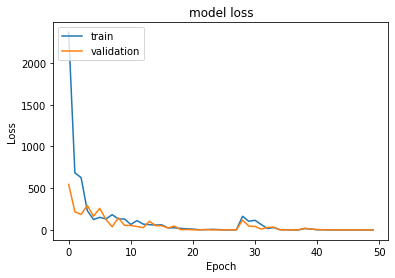

In [55]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.262872, G-Mean=0.489


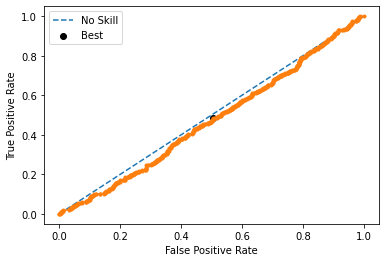

In [56]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

#### Let's tune the threshold using ROC-AUC

- There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

- Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = True Positive / (True Positive + False Negative)

Specificity = True Negative / (False Positive + True Negative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

- The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score(),

and select the threshold with the largest G-Mean value.

In [57]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [ True]])

In [58]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

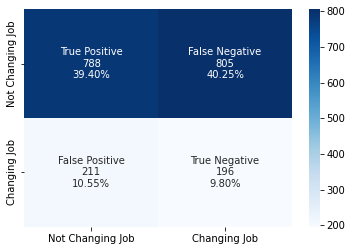

In [59]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [60]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.49      0.61      1593
           1       0.20      0.48      0.28       407

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.44      2000
weighted avg       0.67      0.49      0.54      2000



### Observation
- We have used multiple hidden layer to build our neural network. So, we have received this Recall-score.

- Now let's try to use the Batch Normalization technique and check to see if we can increase the Recall score.

## Model 2

In [61]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [62]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [63]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [64]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [65]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 0.5187 - accuracy: 0.7862 - val_loss: 0.5233 - val_accuracy: 0.7837
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.5047 - accuracy: 0.7944 - val_loss: 0.5857 - val_accuracy: 0.7188
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.5044 - accuracy: 0.7948 - val_loss: 0.5051 - val_accuracy: 0.7994
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5012 - accuracy: 0.7953 - val_loss: 0.5348 - val_accuracy: 0.7825
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.5021 - accuracy: 0.7953 - val_loss: 0.5084 - val_accuracy: 0.7994
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.5023 - accuracy: 0.7955 - val_loss: 0.5055 - val_accuracy: 0.7994
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5006 - accuracy: 0.7953 - val_loss: 0.5053 - val_accuracy: 0.7994
Epoch 

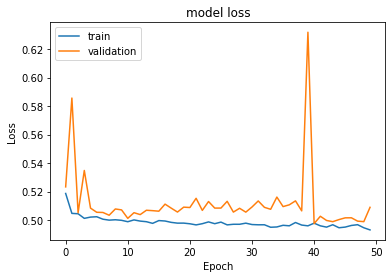

In [66]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

- The Validation and Train model should follow a definite pattern if there were no anomaly.  From the above data it seems to have overfitted on the training data because there is a significant difference in performance between train and validation, because we observe that there is a lot of noise in the model.

Best Threshold=0.155106, G-Mean=0.568


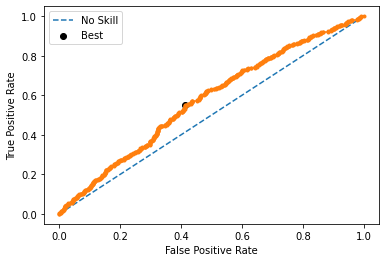

In [67]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [68]:
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

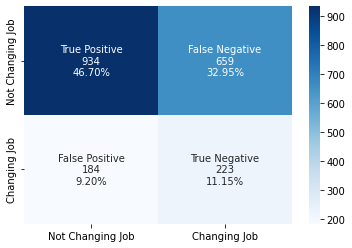

In [69]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test, y_pred_e2)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [70]:
#Accuracy as per the classification report 
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

           0       0.84      0.59      0.69      1593
           1       0.25      0.55      0.35       407

    accuracy                           0.58      2000
   macro avg       0.54      0.57      0.52      2000
weighted avg       0.72      0.58      0.62      2000



- The Train and Validation curves seem to show overfitting despite having a good Recall score and a low False Negative rate.

- Let's try to use the Dropout technique and check to see if it can reduce the False Negative rate.

### Model 3

In [71]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [72]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [73]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [74]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [75]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 461.1483 - accuracy: 0.6627 - val_loss: 13.3771 - val_accuracy: 0.5312
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 32.5562 - accuracy: 0.6722 - val_loss: 5.8800 - val_accuracy: 0.1994
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 11.6048 - accuracy: 0.6867 - val_loss: 0.6951 - val_accuracy: 0.8000
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 6.0066 - accuracy: 0.7034 - val_loss: 3.8557 - val_accuracy: 0.8000
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 3.4623 - accuracy: 0.7273 - val_loss: 0.5386 - val_accuracy: 0.8000
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 2.0318 - accuracy: 0.7502 - val_loss: 0.5295 - val_accuracy: 0.8000
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 1.9595 - accuracy: 0.7620 - val_loss: 0.5369 - val_accuracy: 0.8000
E

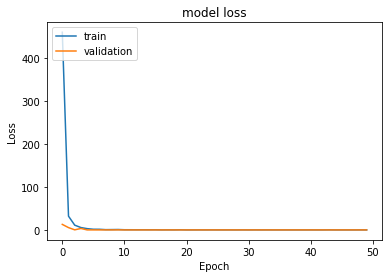

In [76]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that both the curves train and validation are smooth.

Best Threshold=1.226794, G-Mean=0.000


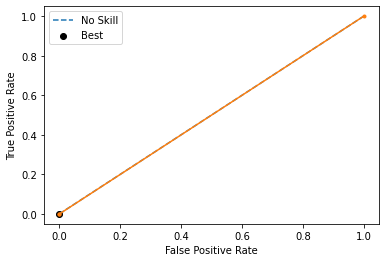

In [77]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [78]:
y_pred_e3=model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

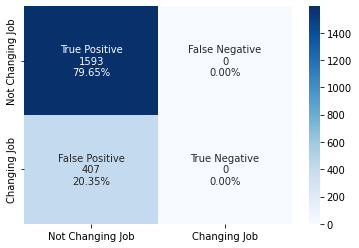

In [79]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_pred_e3)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [80]:
#Accuracy as per the classification report 
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



- The Dropout technique helped the model reduce the loss function of both train and validation. But, The Recall score seems to be Zero for decting the exited customer,which is horrible.

- Now, let's try to use some of the Hyperparameter Optimization techniques we have learnt, such as RandomizedSearchCV, GridSearchCV and Keras Tuner to increase the Recall score of the model.

### Model 4
#### Random Search CV
Some important hyperparameters to look out for while optimizing neural networks are:

Type of Architecture

Number of Layers

Number of Neurons in a layer

Regularization hyperparameters

Learning Rate

Type of Optimizer

Dropout Rate

- We are using Random search to optimize two hyperparameters - Batch size & Learning Rate.


In [81]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [82]:
def create_model_v4(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [83]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [84]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 2s 7ms/step - loss: 10812.6748 - accuracy: 0.7928 - val_loss: 0.5004 - val_accuracy: 0.8000
Best: 0.796250 using {'lr': 0.1, 'batch_size': 32}


- The best model is with the following configuration:

- ( It may vary each time the code runs )

- Result of Random Search

- {'batch_size': 32, 'learning_rate": 0.1}

- Let's create the final model with the above mentioned configuration

In [85]:
estimator_v4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [86]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 2s 9ms/step - loss: 20486.9922 - accuracy: 0.7822 - val_loss: 0.5007 - val_accuracy: 0.8000
Epoch 2/50
100/100 [==============================] - 1s 6ms/step - loss: 0.5071 - accuracy: 0.7953 - val_loss: 0.5011 - val_accuracy: 0.8000
Epoch 3/50
100/100 [==============================] - 1s 7ms/step - loss: 2.1692 - accuracy: 0.7952 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 3.9731 - accuracy: 0.7952 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5076 - accuracy: 0.7953 - val_loss: 0.5007 - val_accuracy: 0.8000
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5073 - accuracy: 0.7953 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5077 - accuracy: 0.7953 - val_loss: 0.5004 - val_accuracy: 0.8000
Ep

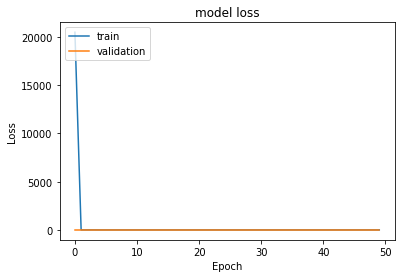

In [87]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=1.180304, G-Mean=0.000


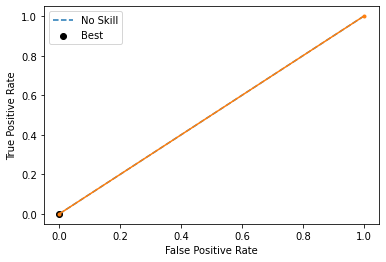

In [88]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [89]:
y_pred_e4=estimator_v4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

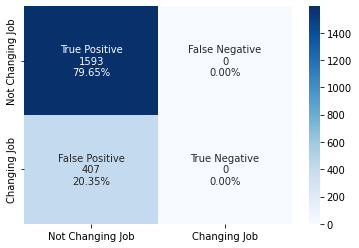

In [90]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred_e4)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [91]:
#Accuracy as per the classification report 
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



- Hyperparameter tuning is used here to get a better Recall score, but the Recall  score shows no significant value to measure in the case of Recall score for customers leaving the bank service.

- Other hyperparameters can also be tuned to get better performance on the metrics.

- There is a very low chance of finding a highly optimal configuration.

- Let's use the more exhaustive Grid Search CV and see if the Recall score increases.

### Model 6

### Grid Search CV¶

- Some important hyperparameters to look out for while optimizing neural networks are:

- Type of Architecture

- Number of Layers

- Number of Neurons in a layer

- Regularization hyperparameters

- Learning Rate

- Type of Optimizer

- Dropout Rate

In [92]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [93]:
def create_model_v5(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

- We're using Grid Search to optimize two hyperparameters - Batch Size & Learning Rate.

- You can also optimize the other hyperparameters as mentioned above.

In [94]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [95]:
import time
  
# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
100/100 [==============================] - 1s 5ms/step - loss: 17893.5645 - accuracy: 0.7895 - val_loss: 0.5006 - val_accuracy: 0.8000
Best: 0.796250 using {'batch_size': 64, 'lr': 0.1}
Total runtime of the program is 41.227622985839844


- The best model has the following configuration:


- Result of Grid Search

- {'batch_size': 64, 'learning_rate": 0.1}

- Let's create the final model with the above mentioned configuration

In [96]:
estimator_v5=create_model_v5(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [97]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_5=estimator_v5.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 20486.9922 - accuracy: 0.7822 - val_loss: 0.5007 - val_accuracy: 0.8000
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5071 - accuracy: 0.7953 - val_loss: 0.5011 - val_accuracy: 0.8000
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 2.1692 - accuracy: 0.7952 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 3.9731 - accuracy: 0.7952 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5076 - accuracy: 0.7953 - val_loss: 0.5007 - val_accuracy: 0.8000
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5073 - accuracy: 0.7953 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5077 - accuracy: 0.7953 - val_loss: 0.5004 - val_accuracy: 0.8000
Ep

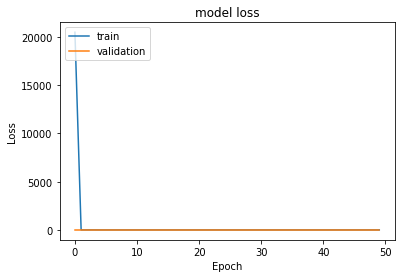

In [98]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=1.180304, G-Mean=0.000


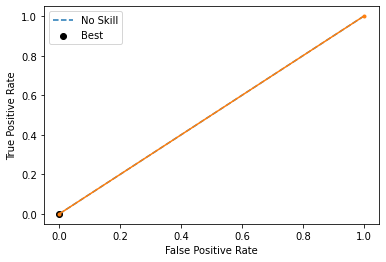

In [99]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator_v5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [100]:
y_pred_e5=estimator_v5.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

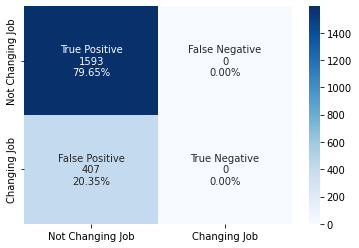

In [101]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, y_pred_e5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm5, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [102]:
#Accuracy as per the classification report 
from sklearn import metrics
cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



- Hyperparameter tuning with Grid Search has been used here to get a better Recall score, but the the Recall  score shows no significant value to measure in the case of Recall score for customers leaving the bank service

- Other hyperparameters can also be tuned to get better metrics.


### Dask

- There is also another library called Dask, sometimes used in the industry to provide a performance boost to Hyperparameter.
- Tuning due to its parallelized computing procedure.
Dask also has the option of implementing Grid Search similar to the Grid Search in Scikit-learn.

In [103]:
# Try below code to install dask in Google Colab
!pip install dask-ml 


     |████████████████████████████████| 148 kB 7.9 MB/s 
     |████████████████████████████████| 837 kB 54.2 MB/s 
     |████████████████████████████████| 134 kB 51.0 MB/s 
     |████████████████████████████████| 830 kB 45.9 MB/s 
     |████████████████████████████████| 822 kB 57.3 MB/s 
     |████████████████████████████████| 802 kB 47.4 MB/s 
     |████████████████████████████████| 802 kB 52.6 MB/s 
     |████████████████████████████████| 793 kB 23.3 MB/s 
     |████████████████████████████████| 793 kB 47.1 MB/s 
     |████████████████████████████████| 791 kB 65.7 MB/s 
     |████████████████████████████████| 786 kB 51.4 MB/s 
     |████████████████████████████████| 779 kB 47.7 MB/s 
     |████████████████████████████████| 778 kB 53.1 MB/s 
     |████████████████████████████████| 776 kB 52.4 MB/s 
     |████████████████████████████████| 769 kB 55.9 MB/s 
     |████████████████████████████████| 766 kB 46.6 MB/s 
     |████████████████████████████████| 1.0 MB 52.2 MB/s 
     |█████████

In [105]:
# importing library
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV

Dask is the same as regular Grid Search in its functioning.
We just have to change the function from GridSearchCV to DaskGridSearchCV.

In [106]:
def create_model_v6(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [107]:
keras_estimator = KerasClassifier(build_fn=create_model_v6, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
dask = DaskGridSearchCV(estimator=keras_estimator, 
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [108]:
import time
  
# store starting time
begin = time.time()


dask_result = dask.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

100/100 [==============================] - 2s 12ms/step - loss: 7096.1631 - accuracy: 0.7664 - val_loss: 0.5008 - val_accuracy: 0.8000
Best: 0.796250 using {'batch_size': 64, 'lr': 0.1}
Total runtime of the program is 53.7202684879303


- Unfortunately, Dask took more time to run the model when compared to Grid Search CV, and this is because Dask has some requirements to perform well:

- The dimension of the dataset should be large.
Dask shows a significant performance improvement in computation when the number and range of hyperparameters we are tuning is large.
Since the dataset dimensions and hyperparameter number/range were small for this example, Dask couldn't show a significant improvement.

- We can also use another optimization technique - Keras Tuner.

In [109]:
## Install Keras Tuner
!pip install keras-tuner 

     |████████████████████████████████| 98 kB 4.8 MB/s 


#### Keras Tuner

In [110]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [111]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

#### Hyperparameters

- How many hidden layers should the model have?
- How many neurons should the model have in each hidden layer?
Learning Rate

In [112]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

- Initialize a tuner (here, RandomSearch). We use objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.

In [113]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

INFO:tensorflow:Reloading Oracle from existing project ./Job_/oracle.json
INFO:tensorflow:Reloading Tuner from ./Job_/tuner0.json


In [114]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [115]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [116]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in ./Job_
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.800000011920929
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.800000011920929
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.800000011920929
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.800000011920929
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_r

#### Model 7
- Let's create a model with the above mentioned best configuration given by Keras Tuner.

In [117]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [118]:
model7 = Sequential()
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))

In [119]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1920      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,665
Trainable params: 121,665
Non-trai

In [120]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [121]:
history_7 = model7.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 2s 9ms/step - loss: 2576.9099 - accuracy: 0.6736 - val_loss: 329.0005 - val_accuracy: 0.7731
Epoch 2/50
100/100 [==============================] - 1s 5ms/step - loss: 305.7090 - accuracy: 0.6839 - val_loss: 312.0190 - val_accuracy: 0.7350
Epoch 3/50
100/100 [==============================] - 1s 5ms/step - loss: 198.9003 - accuracy: 0.6742 - val_loss: 447.7420 - val_accuracy: 0.8006
Epoch 4/50
100/100 [==============================] - 1s 5ms/step - loss: 149.4992 - accuracy: 0.6891 - val_loss: 115.2583 - val_accuracy: 0.8000
Epoch 5/50
100/100 [==============================] - 1s 7ms/step - loss: 117.2012 - accuracy: 0.6847 - val_loss: 68.7116 - val_accuracy: 0.7094
Epoch 6/50
100/100 [==============================] - 0s 5ms/step - loss: 93.3220 - accuracy: 0.6888 - val_loss: 246.8602 - val_accuracy: 0.7994
Epoch 7/50
100/100 [==============================] - 0s 5ms/step - loss: 100.1227 - accuracy: 0.6817 - val_loss: 116.0883 - 

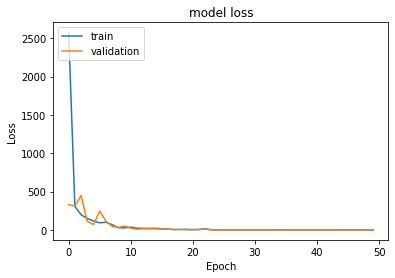

In [122]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that the train and validation curves are smooth.

Best Threshold=0.234344, G-Mean=0.534


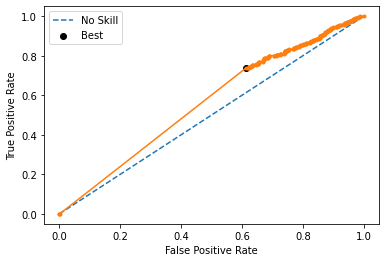

In [123]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = model7.predict(X_test)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [124]:
y_pred_e7=model7.predict(X_test)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

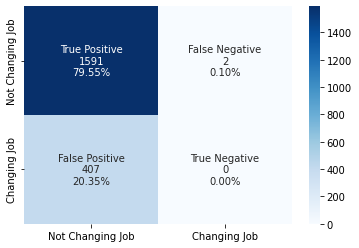

In [125]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm7=confusion_matrix(y_test, y_pred_e7)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm7, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [126]:
#Accuracy as per the classification report 
from sklearn import metrics
cr7=metrics.classification_report(y_test,y_pred_e7)
print(cr7)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



After using the suggested hyperparameters from Keras Tuner, the the Recall  score shows no significant value to measure in the case of Recall score for customers leaving the bank service to the previous optimization technique model.

Further, you can add Batch Normalization and Dropout to the model and check the Recall score.

Let's try to apply SMOTE to balance this dataset and then apply hyperparamter tuning accordingly.

### SMOTE + Keras Tuner

In [127]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [128]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [129]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [130]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Job_Switch')

INFO:tensorflow:Reloading Oracle from existing project ./Job_Switch/oracle.json
INFO:tensorflow:Reloading Tuner from ./Job_Switch/tuner0.json


In [131]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [132]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [133]:
tuner_2.results_summary()

Results summary
Results in ./Job_Switch
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 1.0
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.947802205880483
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.7252747267484665
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.7142857164144516
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate:

In [134]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [135]:
model9 = Sequential()
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [136]:
model9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1920      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,665
Trainable params: 121,665
Non-trai

In [137]:
history_9 = model9.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
160/160 [==============================] - 2s 7ms/step - loss: 1685.3553 - accuracy: 0.5373 - val_loss: 23.2188 - val_accuracy: 0.8776
Epoch 2/50
160/160 [==============================] - 1s 5ms/step - loss: 307.2813 - accuracy: 0.5379 - val_loss: 1.8191 - val_accuracy: 0.9717
Epoch 3/50
160/160 [==============================] - 1s 5ms/step - loss: 131.7639 - accuracy: 0.5485 - val_loss: 270.6293 - val_accuracy: 0.1805
Epoch 4/50
160/160 [==============================] - 1s 5ms/step - loss: 112.1743 - accuracy: 0.5371 - val_loss: 366.3640 - val_accuracy: 0.5816
Epoch 5/50
160/160 [==============================] - 1s 5ms/step - loss: 77.1000 - accuracy: 0.5340 - val_loss: 89.2933 - val_accuracy: 0.0969
Epoch 6/50
160/160 [==============================] - 1s 5ms/step - loss: 39.4362 - accuracy: 0.5443 - val_loss: 37.4778 - val_accuracy: 0.5318
Epoch 7/50
160/160 [==============================] - 1s 5ms/step - loss: 60.4203 - accuracy: 0.5454 - val_loss: 184.5534 - val_ac

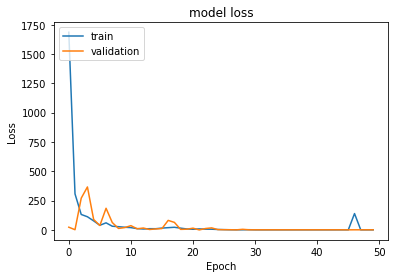

In [138]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

- From the above plot, we observe that there is a lot of noise in the model.

Best Threshold=0.370866, G-Mean=0.066


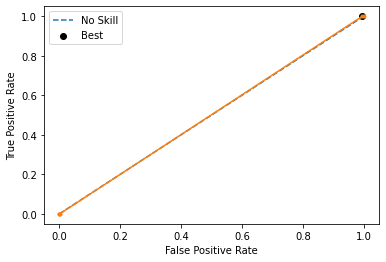

In [139]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat9 = model9.predict(X_test)
# keep probabilities for the positive outcome only
yhat9 = yhat9[:, 0]
# calculate roc curves
fpr, tpr, thresholds9 = roc_curve(y_test, yhat9)
# calculate the g-mean for each threshold
gmeans9 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans9)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds9[ix], gmeans9[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [140]:
y_pred_e9=model9.predict(X_test)
y_pred_e9 = (y_pred_e9 > thresholds9[ix])
y_pred_e9

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

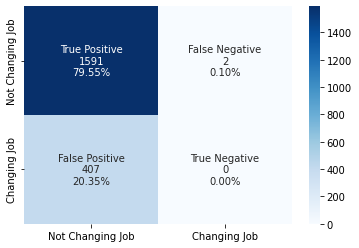

In [141]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm9=confusion_matrix(y_test, y_pred_e9)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm9, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [142]:
#Accuracy as per the classification report 
from sklearn import metrics
cr6=metrics.classification_report(y_test,y_pred_e9)
print(cr6)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



- After applying the SMOTE technique to the data, the Recall  score shows no significant value to measure in the case of Recall score for customers leaving the bank service.

Let's use Grid Search CV and see if we can increase the model's performance on the metrics.

In [143]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [144]:
def create_model_v7(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [145]:
keras_estimator = KerasClassifier(build_fn=create_model_v7, verbose=1)

In [146]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 1s 4ms/step - loss: 234.7517 - accuracy: 0.7016 - val_loss: 0.5013 - val_accuracy: 0.8000


In [147]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.796250 using {'batch_size': 32, 'lr': 0.01}


In [148]:
estimator_v7=create_model_v7(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [149]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_7=estimator_v7.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
319/319 [==============================] - 2s 4ms/step - loss: 204.1415 - accuracy: 0.5970 - val_loss: 0.9678 - val_accuracy: 0.0000e+00
Epoch 2/50
319/319 [==============================] - 1s 3ms/step - loss: 0.8219 - accuracy: 0.6253 - val_loss: 1.0048 - val_accuracy: 0.0000e+00
Epoch 3/50
319/319 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.6245 - val_loss: 0.9392 - val_accuracy: 0.0000e+00
Epoch 4/50
319/319 [==============================] - 1s 3ms/step - loss: 0.7087 - accuracy: 0.6245 - val_loss: 1.0749 - val_accuracy: 0.0000e+00
Epoch 5/50
319/319 [==============================] - 1s 3ms/step - loss: 0.6809 - accuracy: 0.6247 - val_loss: 1.0388 - val_accuracy: 0.0000e+00
Epoch 6/50
319/319 [==============================] - 1s 3ms/step - loss: 0.6673 - accuracy: 0.6249 - val_loss: 0.9423 - val_accuracy: 0.0000e+00
Epoch 7/50
319/319 [==============================] - 1s 3ms/step - loss: 0.6635 - accuracy: 0.6249 - val_loss: 0.9827 - v

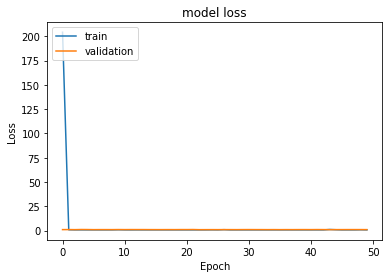

In [150]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

- From the above plot, we don't get any significant benifit in the model.

- Grid Search CV also does not seem to work that well on the SMOTE data.

Best Threshold=1.380685, G-Mean=0.000


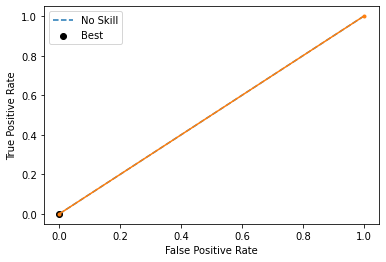

In [151]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat10 = estimator_v7.predict(X_test)
# keep probabilities for the positive outcome only
yhat10 = yhat10[:, 0]
# calculate roc curves
fpr, tpr, thresholds10 = roc_curve(y_test, yhat10)
# calculate the g-mean for each threshold
gmeans10 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans10)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds10[ix], gmeans10[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [152]:
y_pred_e10=estimator_v7.predict(X_test)
y_pred_e10 = (y_pred_e10 > thresholds10[ix])
y_pred_e10

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

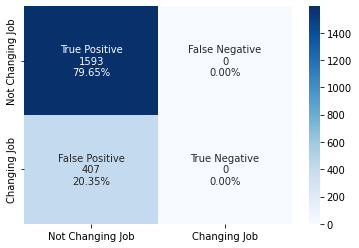

In [153]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm10=confusion_matrix(y_test, y_pred_e10)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm10, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [154]:
#Accuracy as per the classification report 
from sklearn import metrics
cr10=metrics.classification_report(y_test,y_pred_e10)
print(cr10)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



- Oversampling using SMOTE did not help improve the Recall score.  Recall  score shows no significant value to measure in the case of Recall score for customers leaving the bank service.

- In this dataset, the SMOTE oversampling technique does not work well, as both the models we tried building have overfitted on the training dataset.

#### So, our final model here can be **Model 2**, which uses the Batch Normalization technique and works on the imbalanced dataset. The Recall score for the customers leaving the bank is the highest 0.55.

### Business Recommendations

* The `Cutomer Care` department of the bank can deploy the final model `Model 2` from this exercise to identify with a reasonable degree of accuracy whether a customer is likely to switch their bank services or not, and this process seems to be easier and more time-efficient than other methods.
